# Tarea 1
En esta tarea partimos de los datos del csv *airbnb.csv*, un listado de información sobre las ofertas existentes de airbnb para la ciudad de Madrid, en abril de 2017.
Realizaremos una serie de ejercicios sobre el conjunto de datos del csv:
* Estudio de los datos y de la variable room_type
* Entrenamiento de los datos
* Validación de los datos

## Ejercicio 1 - Estudio de los datos y de la variable room_type
En este ejercicio cargaremos los datos a partir de la función *load_data* del archivo *load_data.py*. Mostramos los registros del dataset.

In [2]:
## imports 
import matplotlib.pyplot as plt
from load_data import load_data, split_train_test
 
airbnb = load_data()
airbnb

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Centro,Justicia,40.424715,-3.698638,Entire home/apt,49,28,35,0.42,1,99
1,Centro,Embajadores,40.413418,-3.706838,Entire home/apt,80,5,18,0.30,1,188
2,Moncloa - Aravaca,Argüelles,40.424920,-3.713446,Entire home/apt,40,2,21,0.25,9,195
3,Moncloa - Aravaca,Casa de Campo,40.431027,-3.724586,Entire home/apt,55,2,3,0.13,9,334
4,Latina,Cármenes,40.403410,-3.740842,Private room,16,2,23,0.76,2,250
...,...,...,...,...,...,...,...,...,...,...,...
13316,Centro,Justicia,40.427500,-3.698354,Private room,14,1,0,0.00,1,10
13317,Chamberí,Gaztambide,40.431187,-3.711909,Entire home/apt,47,1,0,0.00,7,354
13318,Centro,Palacio,40.413552,-3.711461,Entire home/apt,60,2,0,0.00,1,17
13319,Centro,Universidad,40.425400,-3.709921,Entire home/apt,150,5,0,0.00,1,15


Como podemos observar, la variable *neighbourhood_group* nos indica la zona de madrid en la que se sitúa. *Neighbourhood* es el barrio donde se encuentra el piso. *Latitude* y *longitude* son la latitud y la longitud geográficas del piso. *Room_type* es el tipo de apartamento (si se alquila entero o una habitación). *Price* es el precio, *minimum_nights* es la cantidad mínima de noches que se tiene que alquilar el piso, *number_of_reviews* es la cantidad de reseñas, *reviews_per_month* es la cantidad media de reviews al mes, *calculated_host_listings_count* es y por último *availability_365* es la disponibilidad del piso al año (en días).

In [3]:
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13321 entries, 0 to 13320
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   neighbourhood_group             13321 non-null  object 
 1   neighbourhood                   13321 non-null  object 
 2   latitude                        13321 non-null  float64
 3   longitude                       13321 non-null  float64
 4   room_type                       13321 non-null  object 
 5   price                           13321 non-null  int64  
 6   minimum_nights                  13321 non-null  int64  
 7   number_of_reviews               13321 non-null  int64  
 8   reviews_per_month               13321 non-null  float64
 9   calculated_host_listings_count  13321 non-null  int64  
 10  availability_365                13321 non-null  int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 1.1+ MB


In [4]:
airbnb.describe()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,13321.000000,13321.000000,13321.000000,13321.000000,13321.000000,13321.000000,13321.000000,13321.000000
mean,40.420730,-3.697268,69.171834,3.010885,22.986037,1.520329,7.605885,205.867202
std,0.020344,0.023832,103.721126,12.835619,38.406006,1.852367,19.619972,126.968961
min,40.331888,-3.863907,9.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,40.410090,-3.707856,31.000000,1.000000,1.000000,0.110000,1.000000,84.000000
50%,40.418731,-3.701602,53.000000,2.000000,7.000000,0.780000,2.000000,247.000000
75%,40.427997,-3.693818,80.000000,3.000000,28.000000,2.320000,4.000000,321.000000
max,40.562736,-3.526821,7700.000000,1125.000000,446.000000,17.210000,145.000000,365.000000


In [5]:
airbnb['room_type'].value_counts()

Entire home/apt    7926
Private room       5203
Shared room         192
Name: room_type, dtype: int64

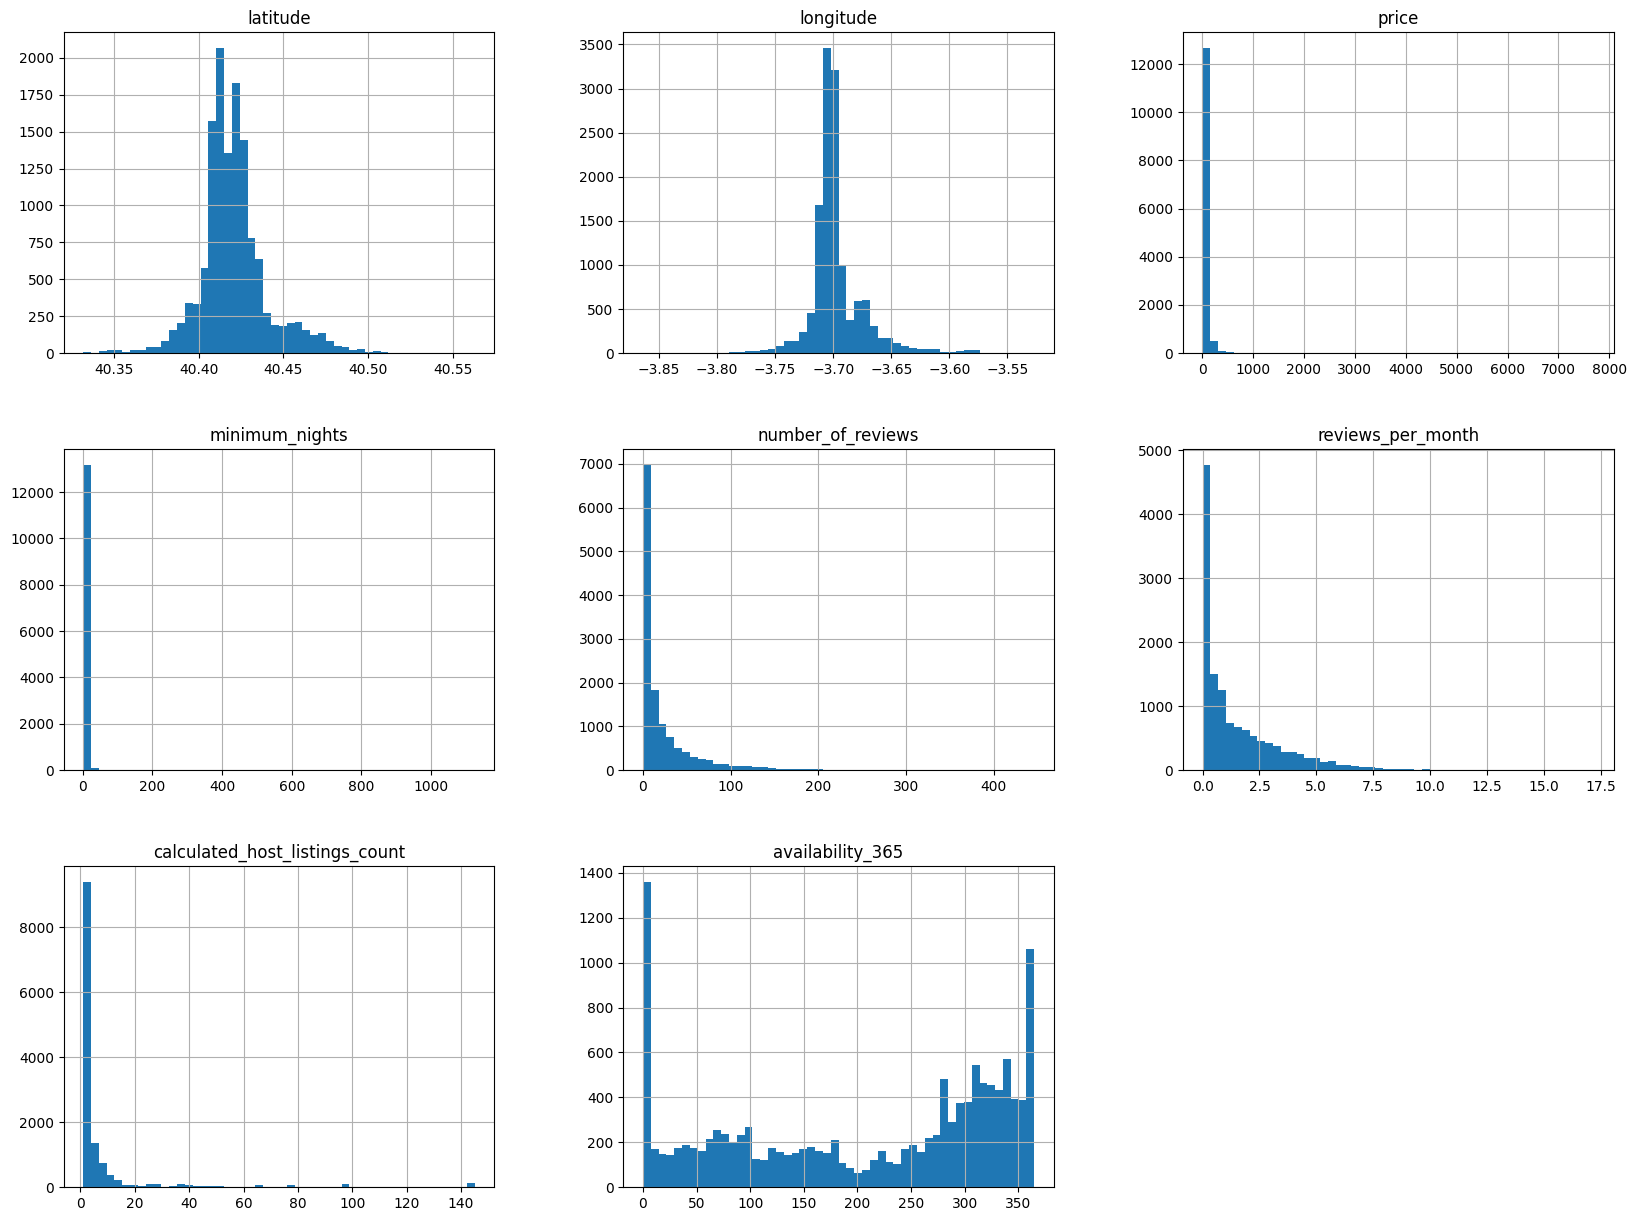

In [4]:
%matplotlib inline 
airbnb.hist(bins=50, figsize=(20,15))
plt.show()

In [6]:
train_set, test_set = split_train_test(airbnb, 0.2)

Datos separados


In [7]:
len(train_set)

10657

In [8]:
len(test_set)

2664